# **Tarea S801 - Visualitzacions en Python**

Aquesta pràctica permetrà explorar com es poden utilitzar eines de visualització avançades en Python per a interpretar i presentar dades de manera efectiva, proporcionant una oportunitat valuosa per a millorar les habilitats analítiques i tècniques.

### **Nivel 1**

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [198]:
"""1º Importo las librerías que creo que puedo necesitar en esta tarea."""

import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import squarify

In [5]:
try:
    connection = mysql.connector.connect(host='localhost',
                                         database= 'new_transactions',
                                         user= 'root',
                                         password='Gregorio@00')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

"""Conexión a SQL sin errores"""

Connected to MySQL Server version  8.0.39
You're connected to database:  ('new_transactions',)
MySQL connection is closed


'Conexión a SQL sin errores'

In [7]:
"""Para guardar todos las tablas en un dataframe, puedo crear un diccionario.
dataframe = {}
Con un bucle for puedo recorrer las tablas con una query e ir guardándolas:
query = "SELECT * FROM {tabla}
Ver cómo se guardan las tablas, si están numeradas las puedo recorrer sin problemas."""

import mysql.connector
import pandas as pd

conexion = mysql.connector.connect(host='localhost',
                               database='new_transactions',
                               user='root',
                               password='Gregorio@00')

# Guardar tablas en un diccionario
cursor = conexion.cursor()
cursor.execute("SHOW TABLES;")
tables= cursor.fetchall()
print(tables)               # Para ver cómo están guardadas las tablas --> están guardadas como tuplas, elem[0] de cada tupla es una tabla

dict_transactions = {}      # defino el diccionario donde guardaré las tablas

for elem in tables:         # recorro cada tabla y la voy añadiendo al diccionario --> diccionario anidado
    query = "SELECT * FROM " + elem[0]
    dict_transactions[elem[0]] = pd.read_sql(query, conexion)

[('card_status',), ('companies',), ('credit_cards',), ('data_users',), ('products',), ('trans_prod',), ('transactions',)]


C:\Users\maria\AppData\Local\Temp\ipykernel_22808\580628673.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dict_transactions[elem[0]] = pd.read_sql(query, conexion)


In [ ]:
""" print(dict_transactions['transactions'].info())
print(dict_transactions['card_status'].info())
print(dict_transactions['companies'].info())
print(dict_transactions['data_users'].info())
print(dict_transactions['products'].info())
print(dict_transactions['trans_prod'].info()) """

In [ ]:
# Compruebo las claves de mi diccionario
dict_transactions.keys()

dict_keys(['card_status', 'companies', 'credit_cards', 'data_users', 'products', 'trans_prod', 'transactions'])

In [11]:
type(dict_transactions['transactions']['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
dict_transactions['transactions']['timestamp'] = pd.to_datetime(dict_transactions['transactions']['timestamp'])
type(dict_transactions['transactions']['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [195]:
# Creo columna year
dict_transactions['transactions']['year'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.year)

# Columna month
dict_transactions['transactions']['month'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.month)

# Columna day
dict_transactions['transactions']['day'] = dict_transactions['transactions']['timestamp'].apply(lambda x: x.day)

dict_transactions['transactions'].head(10)

,transaction_id,credit_card_id,company_id,timestamp,amount,declined,product_list,user_id,lat,longitude,year_month,year,month,day
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,2021-08,2021,8,28
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,2021-07,2021,7,26
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,2022-01,2022,1,6
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,2022-01,2022,1,26
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,2021-10,2021,10,26
5,07A46D48-31A3-7E87-65B9-0DA902AD109F,CcU-3225,b-2386,2021-06-28 21:11:42,340.87,1,"47, 23",272,38.8342,92.1905,2021-06,2021,6,28
6,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1706,10.5757,2021-05,2021,5,11
7,0A476ED9-0C13-1962-F87B-D3563924B539,CcU-4359,b-2302,2022-02-26 20:33:54,430.49,0,"29, 41, 11",221,-56.4901,114.8010,2022-02,2022,2,26
8,0BEB80B7-9D66-1707-CE4B-9DC7E71914B5,CcU-3141,b-2338,2022-03-04 14:54:35,288.81,1,"19, 41, 29, 3",272,23.3264,-13.6037,2022-03,2022,3,4
9,0C7C3A33-9947-3BC1-846D-7BE3D0D17598,CcU-3309,b-2434,2021-04-10 20:58:41,103.44,1,"89, 31",272,63.3615,-68.6667,2021-04,2021,4,10


#### **Ejercicio 1**

Una variable numèrica.

In [143]:
"""Voy a representar las compras mensuales hechas desde los 3 países"""

# Solo transacciones aceptadas y hacer una copia explícita para evitar el warning
accepted_transactions = dict_transactions['transactions'].loc[dict_transactions['transactions']['declined'] == 0].copy()

# Creo columna year_month
accepted_transactions['year_month'] = accepted_transactions['timestamp'].dt.to_period('M')

# Agrupar por mes y sumar las cantidades
monthly_total_accepted_transactions = round(accepted_transactions.groupby(["year_month"], as_index=False)["amount"].sum(), 2)

monthly_total_accepted_transactions

,year_month,amount
0,2021-03,5711.35
1,2021-04,13507.68
2,2021-05,11659.27
3,2021-06,10817.81
4,2021-07,9931.77
5,2021-08,13900.24
6,2021-09,9524.43
7,2021-10,10765.57
8,2021-11,7675.74
9,2021-12,14177.16


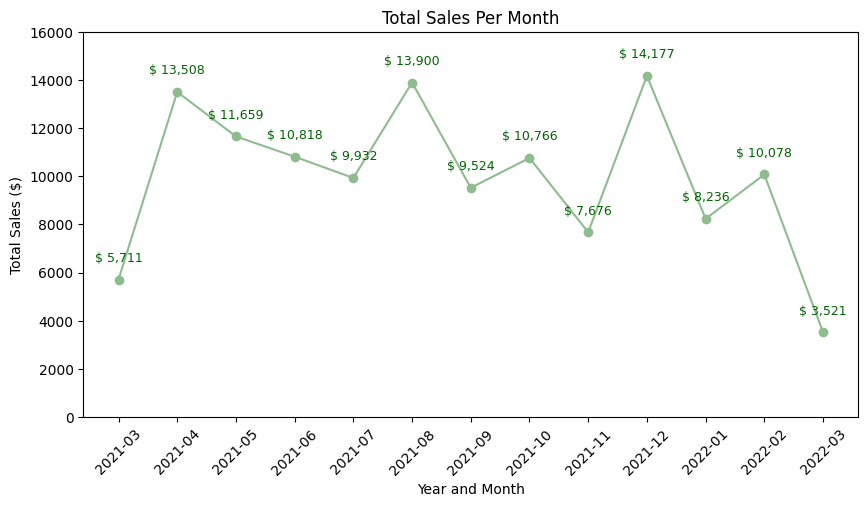

In [ ]:
x = monthly_total_accepted_transactions["year_month"].astype(str)           # Necesito convertirlo a string para representarlo
y = monthly_total_accepted_transactions["amount"]

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, color="darkseagreen",  marker='o' )
plt.title("Total Sales Per Month")
plt.xlabel("Year and Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.ylim(0, 16000)

# Etiquetas de valores
for i, v in enumerate(y):
    plt.text(x[i], v + 750, f"$ {v:,.0f}", ha='center', fontsize=9, color='darkgreen')

# Mostrar
plt.show()

---

#### **Ejercicio 2**

Dues variables numèriques.

In [ ]:
plt.figure(figsize=(7, 5))

sns.scatterplot

plt.show()

In [194]:
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter( 
    x= accepted_transactions['amount'],
    y= dict_transactions['products']['price'],
    mode='markers', 
    marker=dict(
        size=12, # Size
        color='#cb1dd1', # Color
        opacity=0.8, # Point transparency 
        line=dict(width=1, color='black') # Properties of the edges
    ),
))

# Customize the layout
fig.update_layout(
    title='Product price ($) vs. Total sales amount ($)', # Title
    xaxis_title='Sales amount by transaction ($)', # x-axis name
    yaxis_title='Product price ($)', # y-axis name
    width=800,  # Set the width of the figure to 800 pixels
    height=600,  # Set the height of the figure to 600 pixels
)

No hay relación entre el precio de los productos y el total de las transacciones en las que aparecen.

---

#### **Ejercicio 3**

Una variable categòrica.

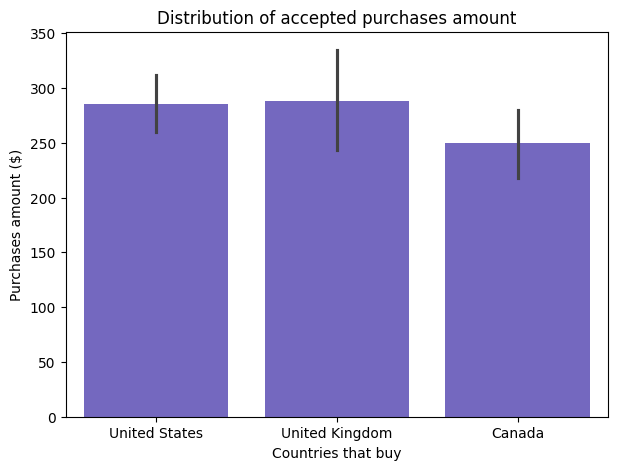

In [134]:
plt.figure(figsize=(7, 5))

# Compras por país
sns.barplot(x= dict_transactions['data_users']['country'], y= accepted_transactions['amount'], color="slateblue", estimator= np.mean)
plt.title("Distribution of accepted purchases amount")
plt.xlabel("Countries that buy")
plt.ylabel("Purchases amount ($)")

plt.show()

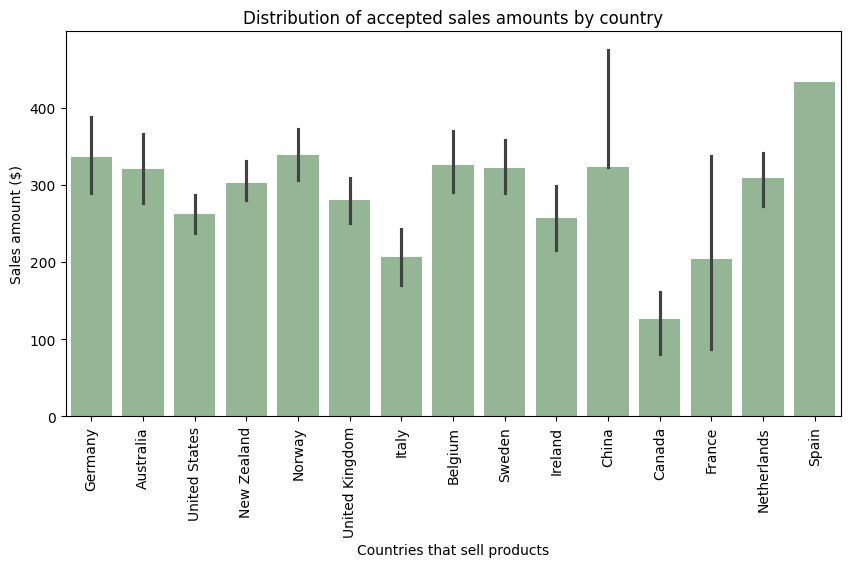

In [201]:
plt.figure(figsize=(10, 5))

# Ventas por país
sns.barplot(x=dict_transactions['companies']['country'], y= accepted_transactions['amount'], color="darkseagreen", estimator="mean", errorbar=("ci", 50))
plt.title("Distribution of accepted sales amounts by country")
plt.xlabel("Countries that sell products")
plt.ylabel("Sales amount ($)")
plt.xticks(rotation=90)

plt.show()

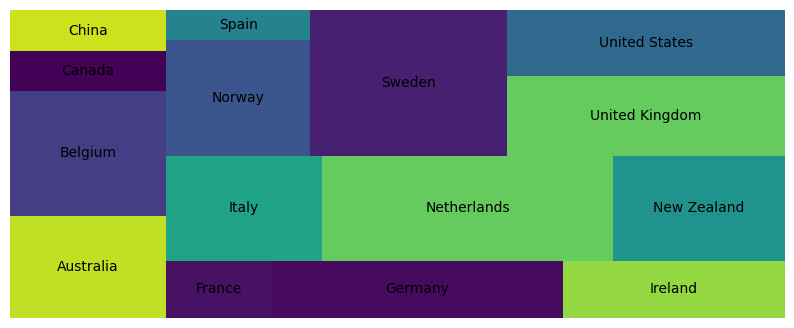

In [203]:
# Agrupo por país y sumo las ventas
country_amounts = accepted_transactions.groupby(dict_transactions['companies']['country'])['amount'].sum().reset_index()

# create a figure
fig, ax = plt.subplots(figsize=(10,4))
ax.set_axis_off()

# add treemap
squarify.plot(
   sizes=country_amounts['amount'],
   label=country_amounts['country'],
   ax=ax
)

# display plot
plt.show()

---

#### **Ejercicio 4**

Una variable categòrica i una numèrica.

---

#### **Ejercicio 5**

Dues variables categòriques.

In [ ]:
# top bar -> sum all values to find y position of the bars
all_transactions = dict_transactions['transactions']['amount'].sum()
country_sales = dict_transactions['companies']['country']

accepted_transactions = dict_transactions['transactions'].loc[dict_transactions['transactions']['declined'] == 0].copy()
accepted_transactions_by_country = round(accepted_transactions.groupby(dict_transactions['companies']['country'], as_index=False)["amount"].sum(), 2)

declined_transactions = dict_transactions['transactions'].loc[dict_transactions['transactions']['declined'] == 1].copy()
declined_transactions_by_country = round(declined_transactions.groupby(dict_transactions['companies']['country'], as_index=False)["amount"].sum(), 2)

C:\Users\maria\AppData\Local\Temp\ipykernel_22808\2694378967.py:6: FutureWarning:

A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.

C:\Users\maria\AppData\Local\Temp\ipykernel_22808\2694378967.py:8: FutureWarning:

A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.



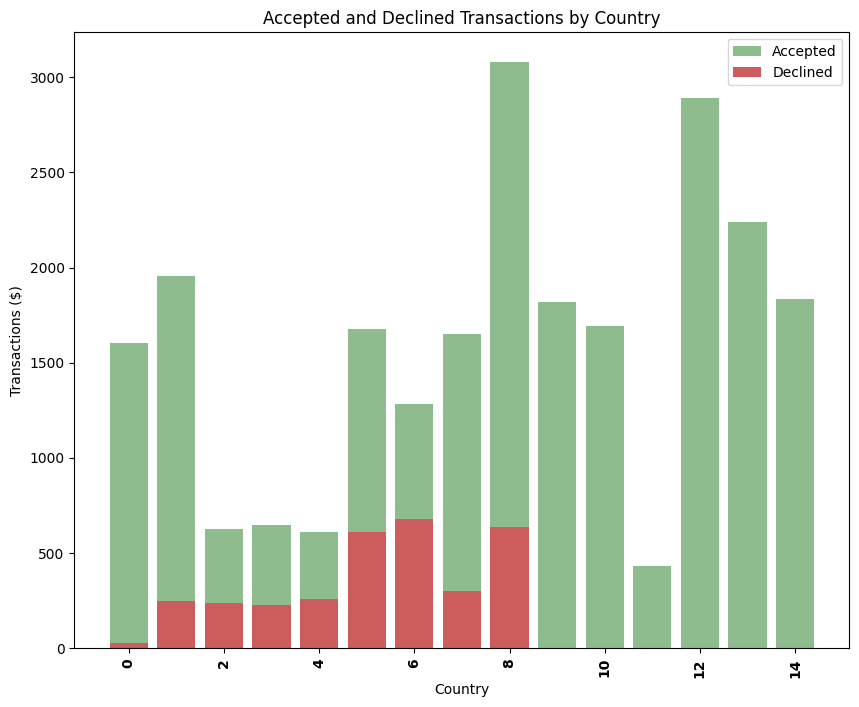

In [193]:
"""Transacciones aceptadas y rechazadas por país"""

# set the figure size
plt.figure(figsize=(10, 8))

# Create accepted bars
plt.bar(x=accepted_transactions_by_country.index, height=accepted_transactions_by_country['amount'], color='darkseagreen', label='Accepted')
# Create declined bars
plt.bar(x=declined_transactions_by_country.index, height=declined_transactions_by_country['amount'], color='indianred', label='Declined')
# Custom X axis
plt.xticks(rotation=90, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Transactions ($)")
plt.title("Accepted and Declined Transactions by Country")
plt.legend()

# Show graphic
plt.show()

# Cambiar los índices de los países por sus nombres y poner etiquetas de valores

---

#### **Ejercicio 6**

Tres variables.

---

#### **Ejercicio 7**

Graficar un Pairplot.

***
***

### **Nivel 2**

#### **Ejercicio 1**

Correlació de totes les variables numèriques.

             amount  declined   user_id       lat  longitude      year  \
amount     1.000000 -0.037882 -0.035354  0.078116   0.043439 -0.088487   
declined  -0.037882  1.000000  0.414293  0.010402  -0.002523 -0.037207   
user_id   -0.035354  0.414293  1.000000 -0.004486   0.017145  0.027736   
lat        0.078116  0.010402 -0.004486  1.000000  -0.006894 -0.024211   
longitude  0.043439 -0.002523  0.017145 -0.006894   1.000000 -0.048819   
year      -0.088487 -0.037207  0.027736 -0.024211  -0.048819  1.000000   
month      0.054914 -0.038702 -0.091357  0.013557   0.021973 -0.655303   
day        0.051248  0.011546 -0.030009  0.025323  -0.009681 -0.129569   

              month       day  
amount     0.054914  0.051248  
declined  -0.038702  0.011546  
user_id   -0.091357 -0.030009  
lat        0.013557  0.025323  
longitude  0.021973 -0.009681  
year      -0.655303 -0.129569  
month      1.000000  0.015286  
day        0.015286  1.000000  


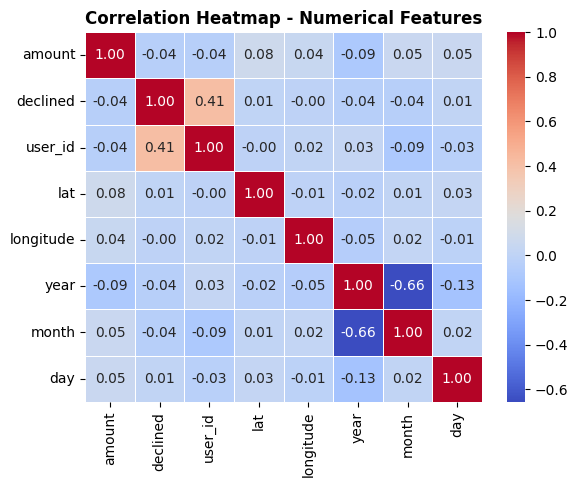

In [ ]:
numerical_cols = dict_transactions['transactions'].select_dtypes(include=['float64', 'int64'])

correlation = numerical_cols.corr()
print(correlation)

sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Features", fontweight="bold")

plt.show()

---

#### **Ejercicio 2**

Implementa un jointplot.

In [ ]:
sns.jointplot(x="age", y="fare", data=titanic, hue='class', kind='scatter', palette='viridis', marker='o')
plt.suptitle("Distribution of Titanic Fares by Age", fontweight="bold", y=1.02)
plt.xlabel("Passenger's Age")
plt.ylabel("Passenger's Fare ($)")
plt.xlim(0, 90)
plt.ylim(0, 600)
plt.show()

---
---

### **Nivel 3**

#### **Ejercicio 1**

Implementa un violinplot combinat amb un altre tipus de gràfic.

---

#### **Ejercicio 2**

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

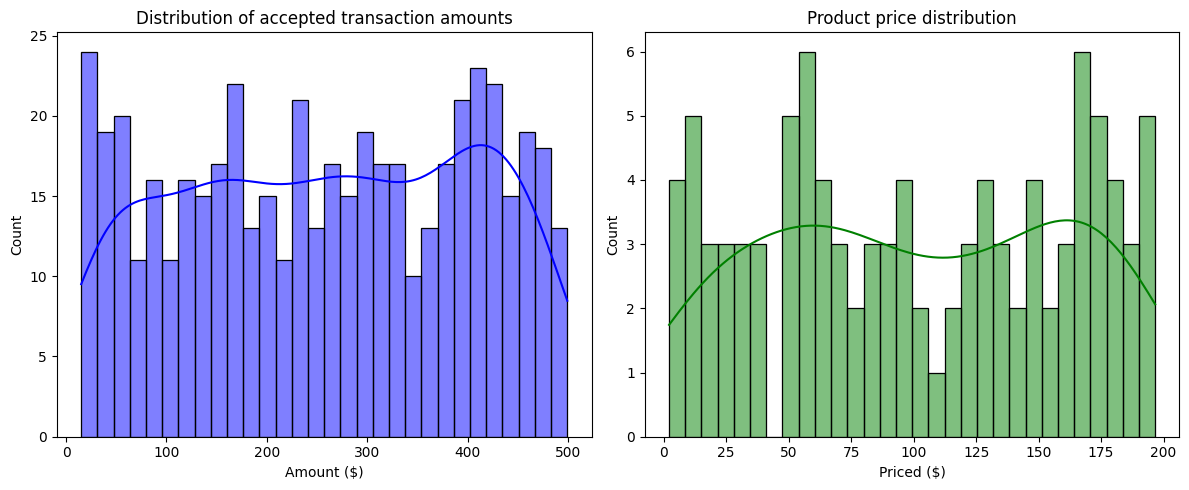

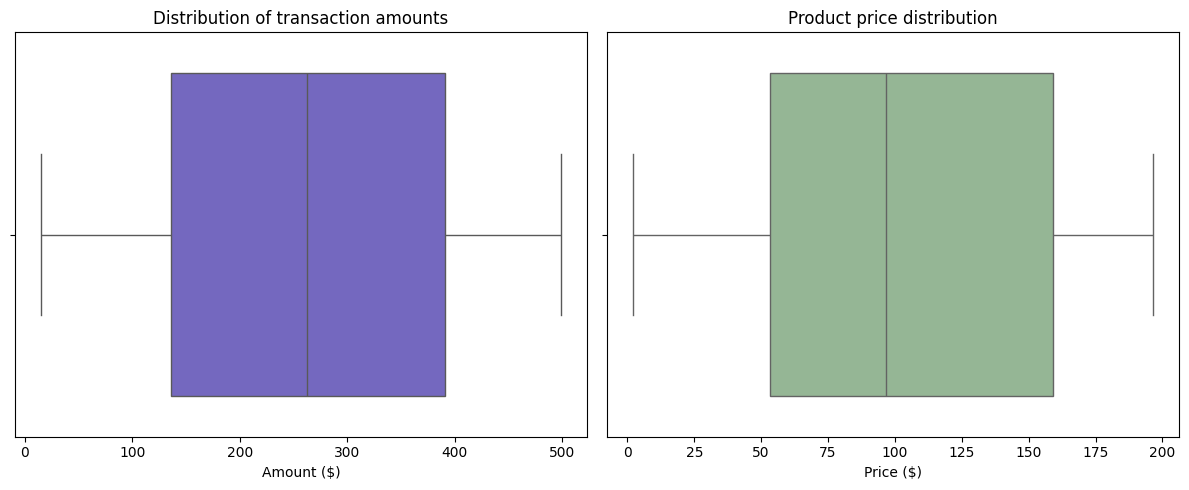

In [112]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histograma de amount
plt.subplot(1, 2, 1)        # Dos gráficos al mismo nivel (uno al lado del otro), el de la izquierda
sns.histplot(accepted_transactions['amount'], bins=30, kde=True, color="blue")
plt.title("Distribution of accepted transaction amounts")
plt.xlabel("Amount ($)")
plt.ylabel("Count")

# Histograma de price
plt.subplot(1, 2, 2)        # Dos gráficos al mismo nivel (uno al lado del otro), el de la derecha
sns.histplot(dict_transactions['products']['price'], bins=30, kde=True, color="green")
plt.title("Product price distribution")
plt.xlabel("Priced ($)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Boxplot de amount
plt.subplot(1, 2, 1)
sns.boxplot(x=accepted_transactions['amount'], color="slateblue")
plt.title("Distribution of transaction amounts")
plt.xlabel("Amount ($)")

# Boxplot de price
plt.subplot(1, 2, 2)
sns.boxplot(x=dict_transactions['products']['price'], color="darkseagreen")
plt.title("Product price distribution")
plt.xlabel("Price ($)")

plt.tight_layout()
plt.show()
